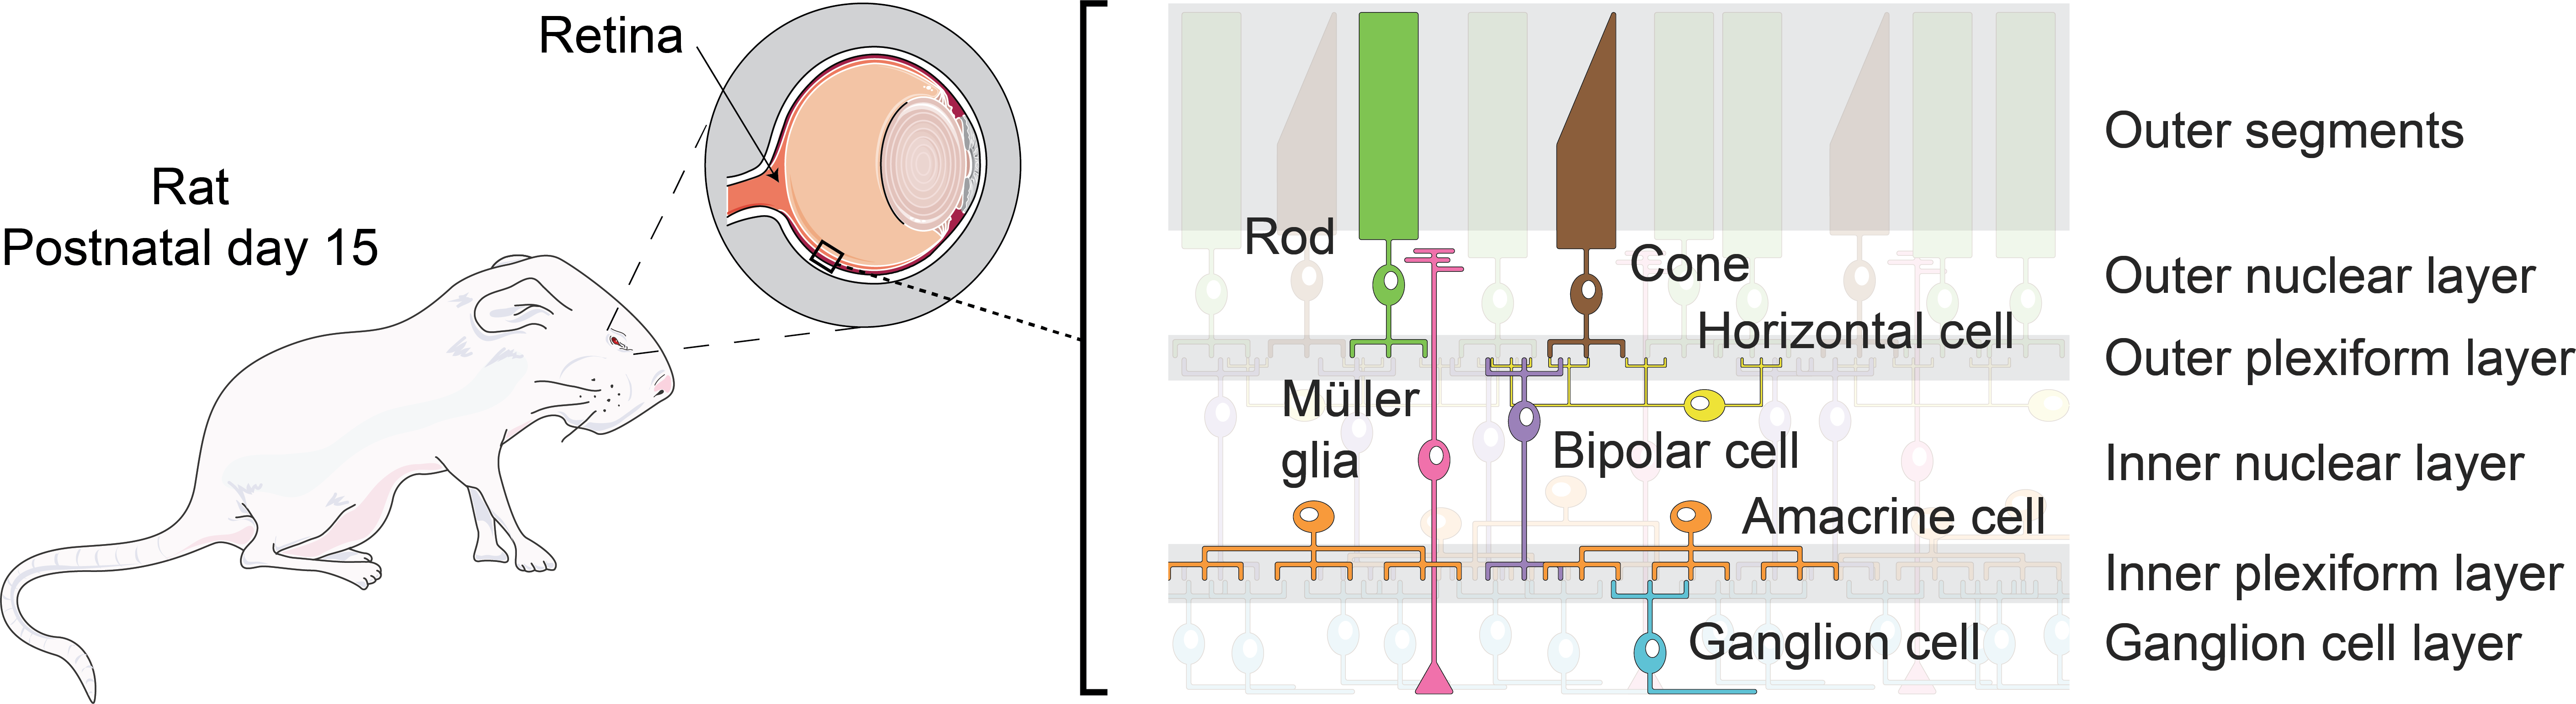

In [1]:
import lma.resample as resample
import lma.plot as plot

First, we will import the rat retina dataset, [Gomes et al., 2011](https://journals.biologists.com/dev/article/138/2/227/44812/Reconstruction-of-rat-retinal-progenitor-cell). This dataset consists of 129 trees with at least 3 cells, acquired by time lapse microscopy of postnatal rat retinal progenitors grown *in vitro*. During this time stage, the progenitors give rise to mostly rod (R) cells, some bipolar (B) and amacrine (A) cells, and few Müller glia (M).

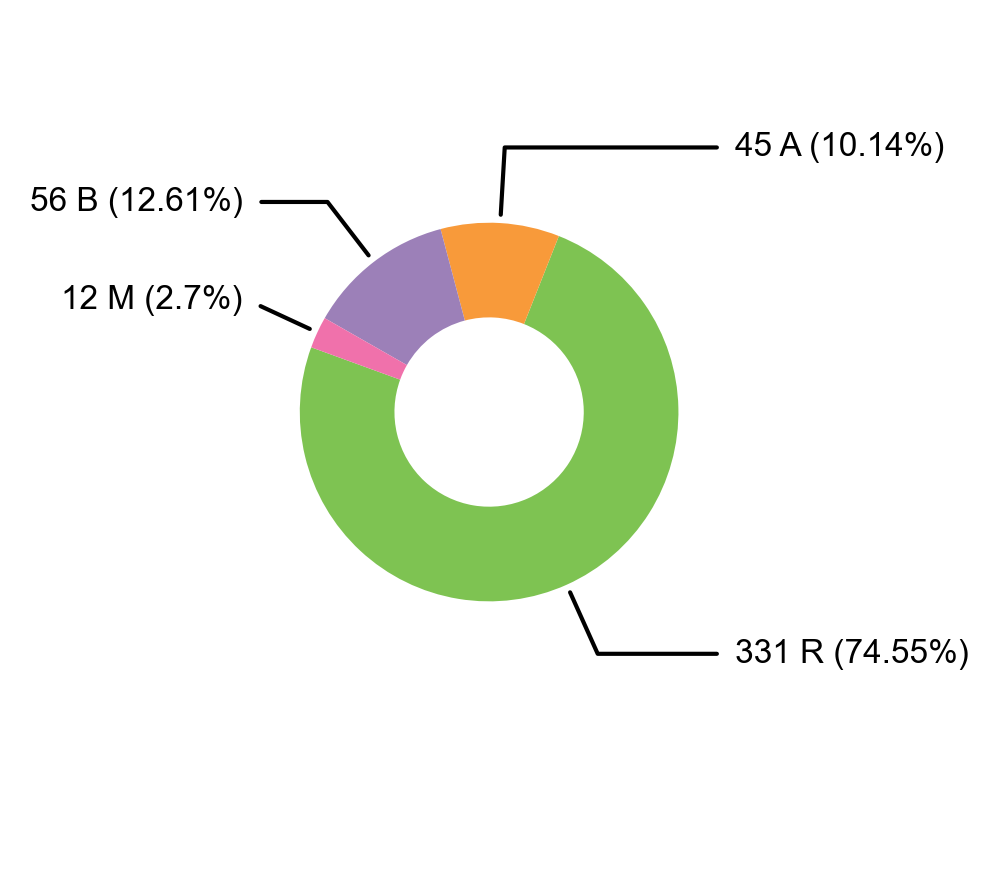

The data should first be formatted into a list where each entry is a tree is represented in [NEWICK format](https://evolution.genetics.washington.edu/phylip/newicktree.html), without branch lengths or interior nodes, separated by semi-colons.

In [2]:
dataset = 'rat_retina'

In [3]:
all_trees_sorted = resample.read_dataset(f'datasets/{dataset}.txt')

# print the first ten trees
all_trees_sorted[:10]

['((R,R),((A,B),((A,R),(B,M))))',
 '(R,((R,R),((R,R),((B,(R,R)),((B,M),(R,R))))))',
 '((A,R),((R,(M,R)),R))',
 '(R,(M,R))',
 '(R,(M,R))',
 '(B,(M,(R,R)))',
 '(R,(R,(R,(M,R))))',
 '(B,(B,M))',
 '(((R,(R,R)),M),R)',
 '(A,(M,R))']

We will first conduct doublet motif analysis by resampling the dataset `num_resamples` times with replacement. The following function `resample_trees_doublets` will automatically detect all cell fates in the dataset. It will output the  doublet dictionary, a list of the detected cell fates, and a DataFrame that lists the number of occurrences for each doublet in each resample and in the original dataset. The DataFrame will also contain the expected number of occurrences for each doublet based on the probabilities of observing each of its constituent cell fates.

## Doublet motif analysis

In [4]:
num_resamples = 10000

In [5]:
(doublet_dict, 
 cell_fates, 
 dfs_concat) = resample.resample_trees_doublets(all_trees_sorted, 
                                                num_resamples, 
                                                True, 
                                                cell_fates='auto'
                                                )

  0%|          | 0/10000 [00:00<?, ?it/s]

In [6]:
doublet_dict

{'(A,A)': 0,
 '(A,B)': 1,
 '(A,M)': 2,
 '(A,R)': 3,
 '(B,B)': 4,
 '(B,M)': 5,
 '(B,R)': 6,
 '(M,M)': 7,
 '(M,R)': 8,
 '(R,R)': 9}

In [7]:
cell_fates

['A', 'B', 'M', 'R']

In [8]:
dfs_concat.head()

,0,1,2,3,4,5,6,7,8,9,...,9992,9993,9994,9995,9996,9997,9998,9999,observed,expected
0,2.0,1.0,1.0,2.0,4.0,1,4.0,3.0,3.0,1.0,...,1.0,0.0,3.0,2.0,3.0,2.0,3.0,4.0,5.0,1.468910
1,4.0,3.0,3.0,2.0,2.0,5,4.0,3.0,6.0,4.0,...,1.0,6.0,2.0,4.0,3.0,4.0,2.0,2.0,12.0,3.655953
2,0.0,1.0,1.0,1.0,1.0,2,2.0,2.0,1.0,0.0,...,0.0,0.0,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.783419
3,23.0,22.0,23.0,25.0,25.0,19,19.0,17.0,23.0,16.0,...,31.0,26.0,27.0,17.0,14.0,18.0,25.0,18.0,15.0,21.609295
4,2.0,1.0,1.0,5.0,6.0,1,1.0,4.0,1.0,2.0,...,3.0,2.0,4.0,3.0,2.0,2.0,1.0,0.0,4.0,2.274815


We will now reformat the DataFrame for plotting. The next function `dfs_for_plotting` generates several DataFrames.

1. `df_true_melt_subset` will contain various characteristics about each of the doublets (i.e., the observed and expected number, z-score, adjusted p-value, etc.)

2. `df_melt_subset` will contain the number of occurences for each subtree in all of the resamples.

3. `df_melt_100resamples_subset` will contain the number of occurences for each subtree in only 100 resamples.

4. `df_zscores_i_concat_melt_subset` will contain the null z-score for each subtree in `num_null` resamples. The null z-scores are calculated by comparison of each resample set to the rest of the resample sets.

5. `df_zscores_i_concat_melt_100resamples_subset` will contain the null z-score for each subtree in 100 resamples.

We can also specify a cutoff number for how many subtrees we would like to include in the final plot. We can use `None` to keep all subtrees, `auto` to keep all subtrees with an absolute z-score above 1, or any number of top significant subtrees to keep (in order of highest to lowest absolute z-score).

In [9]:
cutoff = None

In [10]:
(df_true_melt_subset, 
 df_melt_subset, 
 df_melt_100resamples_subset, 
 df_zscores_i_concat_melt_subset, 
 df_zscores_i_concat_melt_100resamples_subset) = plot.dfs_for_plotting(dfs_concat, 
                                                                       num_resamples, 
                                                                       doublet_dict, 
                                                                       cutoff=cutoff, 
                                                                       num_null=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [11]:
df_true_melt_subset.head()

,subtree_val,observed,expected,z-score,abs z-score,label,null min,null mean,null max,adj_p_val,null z-score min,null z-score mean,null z-score max
1,1,12.0,3.655953,4.443615,4.443615,"(A,B)",0.0,3.6473,12.0,0.002000,-1.940817,0.027531,3.381721
5,5,4.0,0.974921,3.041200,3.041200,"(B,M)",0.0,0.9750,6.0,0.182982,-0.980317,0.030236,5.058623
0,0,5.0,1.468910,2.921098,2.921098,"(A,A)",0.0,1.4596,7.0,0.163984,-1.204428,0.016050,3.748993
4,4,4.0,2.274815,1.137220,1.137220,"(B,B)",0.0,2.2937,12.0,1.954805,-1.528967,0.040902,3.806096
9,9,85.0,79.474185,0.931094,0.931094,"(R,R)",54.0,79.4676,102.0,1.992801,-2.604184,0.009831,3.795084


In [12]:
df_melt_subset.head()

,subtree_val,observed,label
10000,1,4.0,"(A,B)"
10001,1,3.0,"(A,B)"
10002,1,3.0,"(A,B)"
10003,1,2.0,"(A,B)"
10004,1,2.0,"(A,B)"


In [13]:
df_melt_100resamples_subset.head()

,subtree_val,observed,label
100,1,4.0,"(A,B)"
101,1,3.0,"(A,B)"
102,1,3.0,"(A,B)"
103,1,2.0,"(A,B)"
104,1,2.0,"(A,B)"


In [14]:
df_zscores_i_concat_melt_subset.head()

,subtree_val,observed,label
1000,1,0.187645,"(A,B)"
1001,1,-0.344381,"(A,B)"
1002,1,-0.344381,"(A,B)"
1003,1,-0.876437,"(A,B)"
1004,1,-0.876437,"(A,B)"


In [15]:
df_zscores_i_concat_melt_100resamples_subset.head()

,subtree_val,observed,label
100,1,0.187645,"(A,B)"
101,1,-0.344381,"(A,B)"
102,1,-0.344381,"(A,B)"
103,1,-0.876437,"(A,B)"
104,1,-0.876437,"(A,B)"


We will specify a dictionary of cell fates with assigned colors for plotting purposes.

In [16]:
cell_fates

['A', 'B', 'M', 'R']

In [17]:
cell_color_dict = plot.make_color_dict(cell_fates, ['#F89A3A', 
                                                    '#9C80B8', 
                                                    '#F071AB', 
                                                    '#7EC352', 
                                                   ])

subtree = 'doublet'

Lastly, we will plot the frequency and deviation plot using the DataFrame outputs from `dfs_for_plotting` and cell color dictionary.

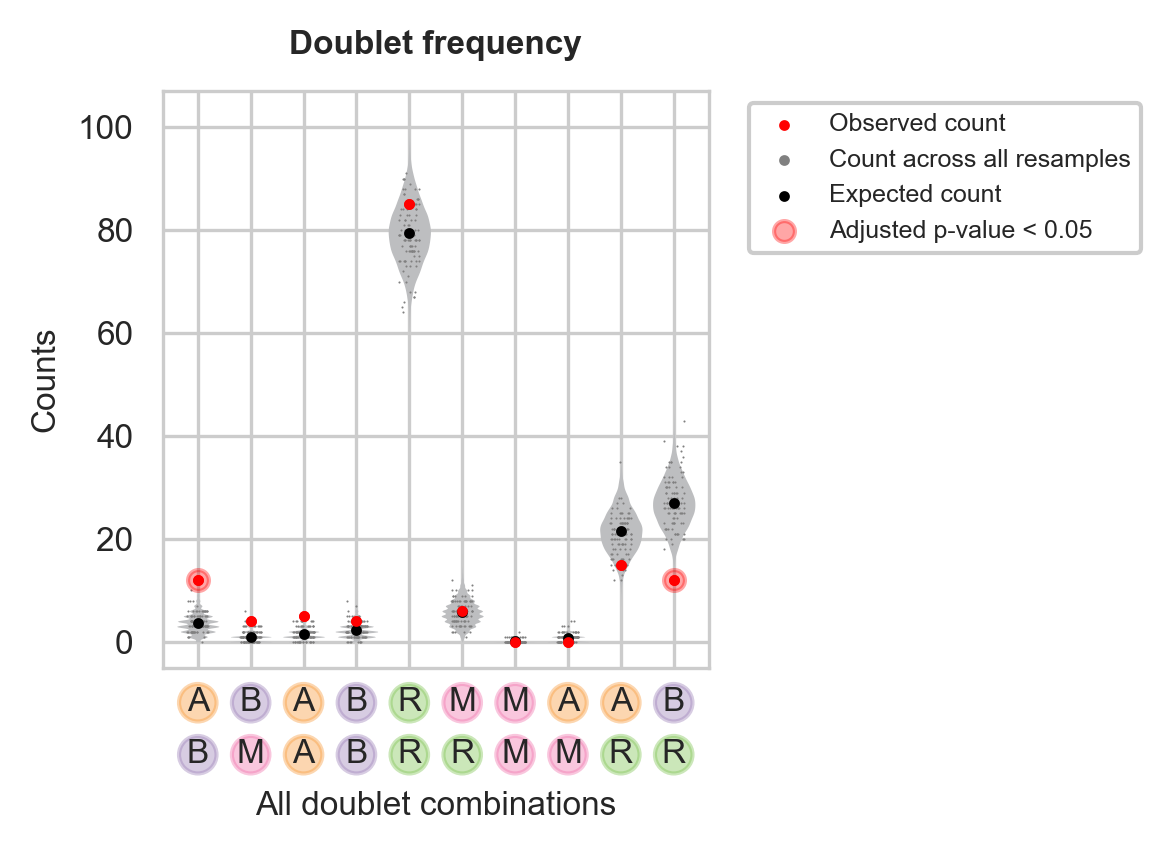

In [18]:
plot.plot_frequency(subtree, 
                    df_true_melt_subset, 
                    df_melt_subset, 
                    df_melt_100resamples_subset, 
                    cell_color_dict,
                    cutoff=cutoff, 
                    legend_bool=True, 
                    legend_pos='outside',
                    save=False, 
                    image_format='png',
                    dpi=300,
                    image_save_path=None)

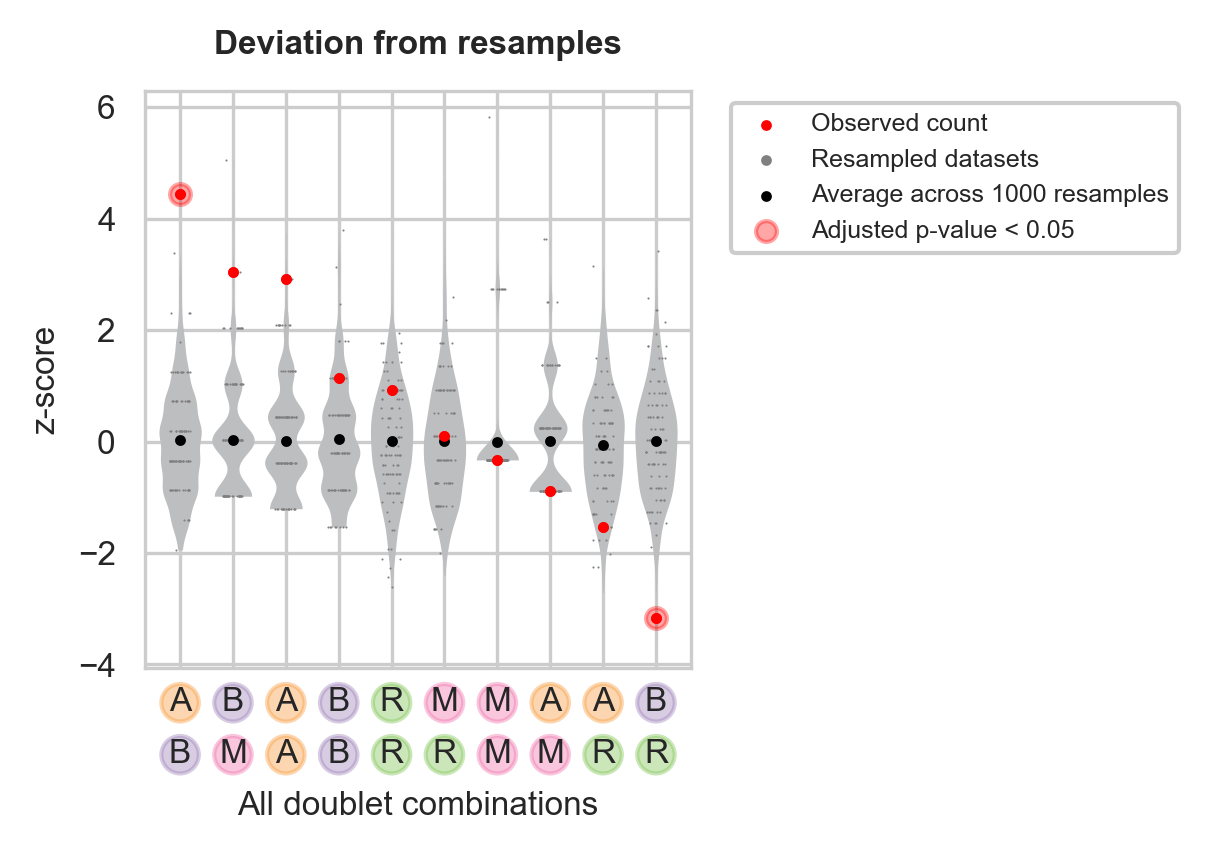

In [19]:
plot.plot_deviation(subtree, 
                    df_true_melt_subset, 
                    df_zscores_i_concat_melt_subset, 
                    df_zscores_i_concat_melt_100resamples_subset, 
                    cell_color_dict,
                    cutoff=cutoff, 
                    num_null=1000,
                    legend_bool=True,
                    legend_pos='outside',
                    save=False, 
                    image_format='png',
                    dpi=300,
                    image_save_path=None)

A similar analysis can be done for triplet and quartet motifs, as shown below.

## Triplet motif analysis

In [33]:
(triplet_dict, 
 cell_fates, 
 dfs_concat) = resample.resample_trees_triplets(all_trees_sorted, 
                                                num_resamples, 
                                                True, 
                                                cell_fates='auto'
                                                )

  0%|          | 0/10000 [00:00<?, ?it/s]

In [34]:
cutoff = 15

In [35]:
(df_true_melt_subset, 
 df_melt_subset, 
 df_melt_100resamples_subset, 
 df_zscores_i_concat_melt_subset, 
 df_zscores_i_concat_melt_100resamples_subset) = plot.dfs_for_plotting(dfs_concat, 
                                                                       num_resamples, 
                                                                       triplet_dict, 
                                                                       cutoff=cutoff, 
                                                                       num_null=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [36]:
subtree = 'triplet'

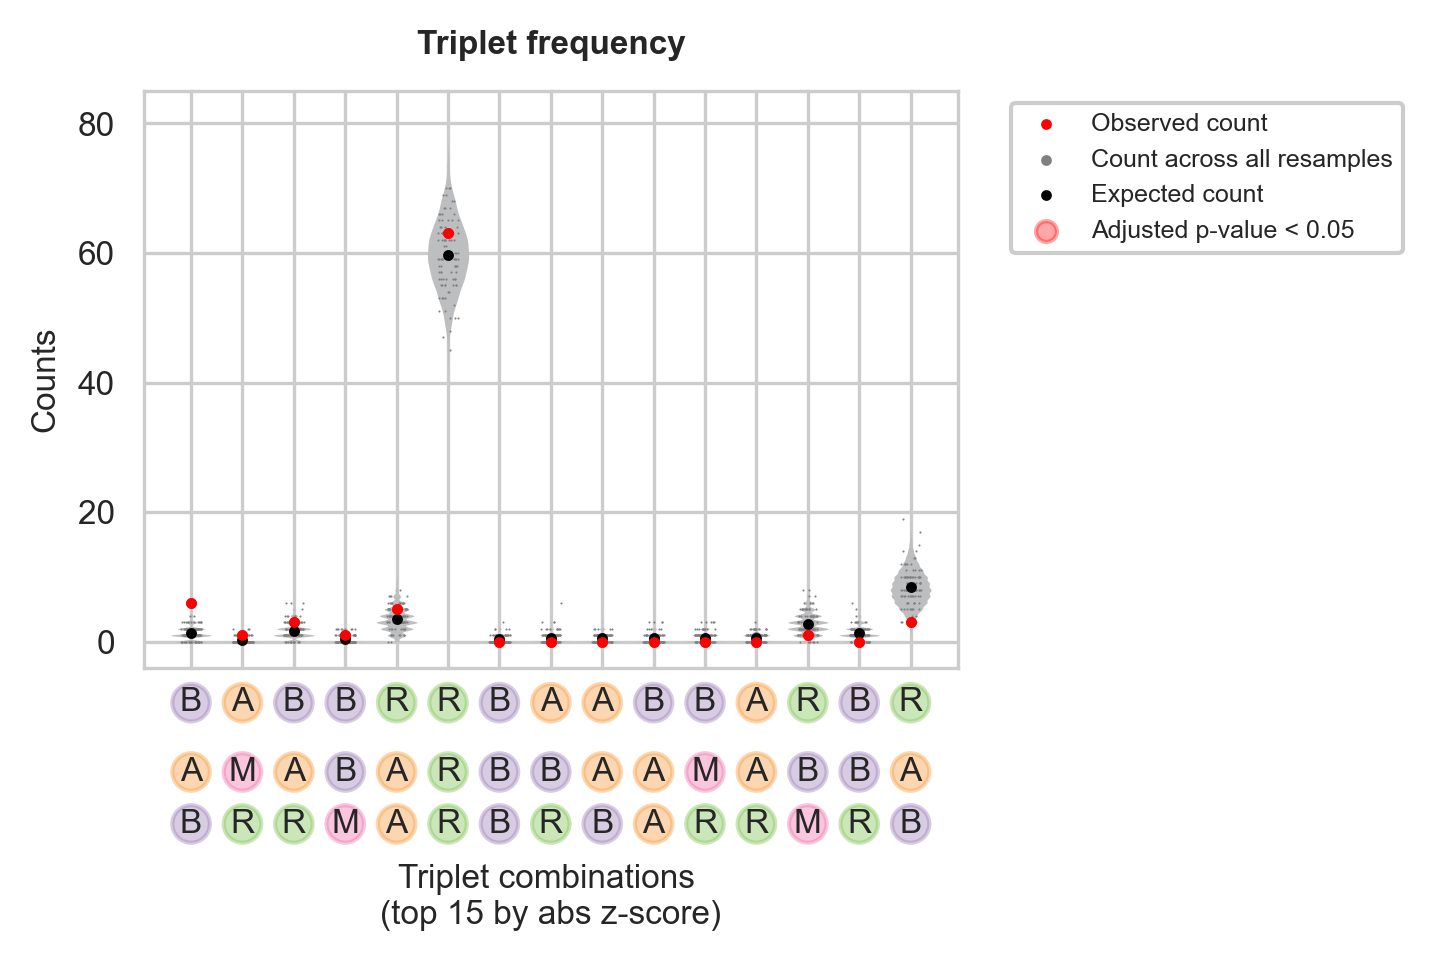

In [37]:
plot.plot_frequency(subtree, 
                    df_true_melt_subset, 
                    df_melt_subset, 
                    df_melt_100resamples_subset, 
                    cell_color_dict,
                    cutoff=cutoff, 
                    legend_bool=True, 
                    legend_pos='outside',
                    save=False, 
                    image_format='png',
                    dpi=300,
                    image_save_path=None)

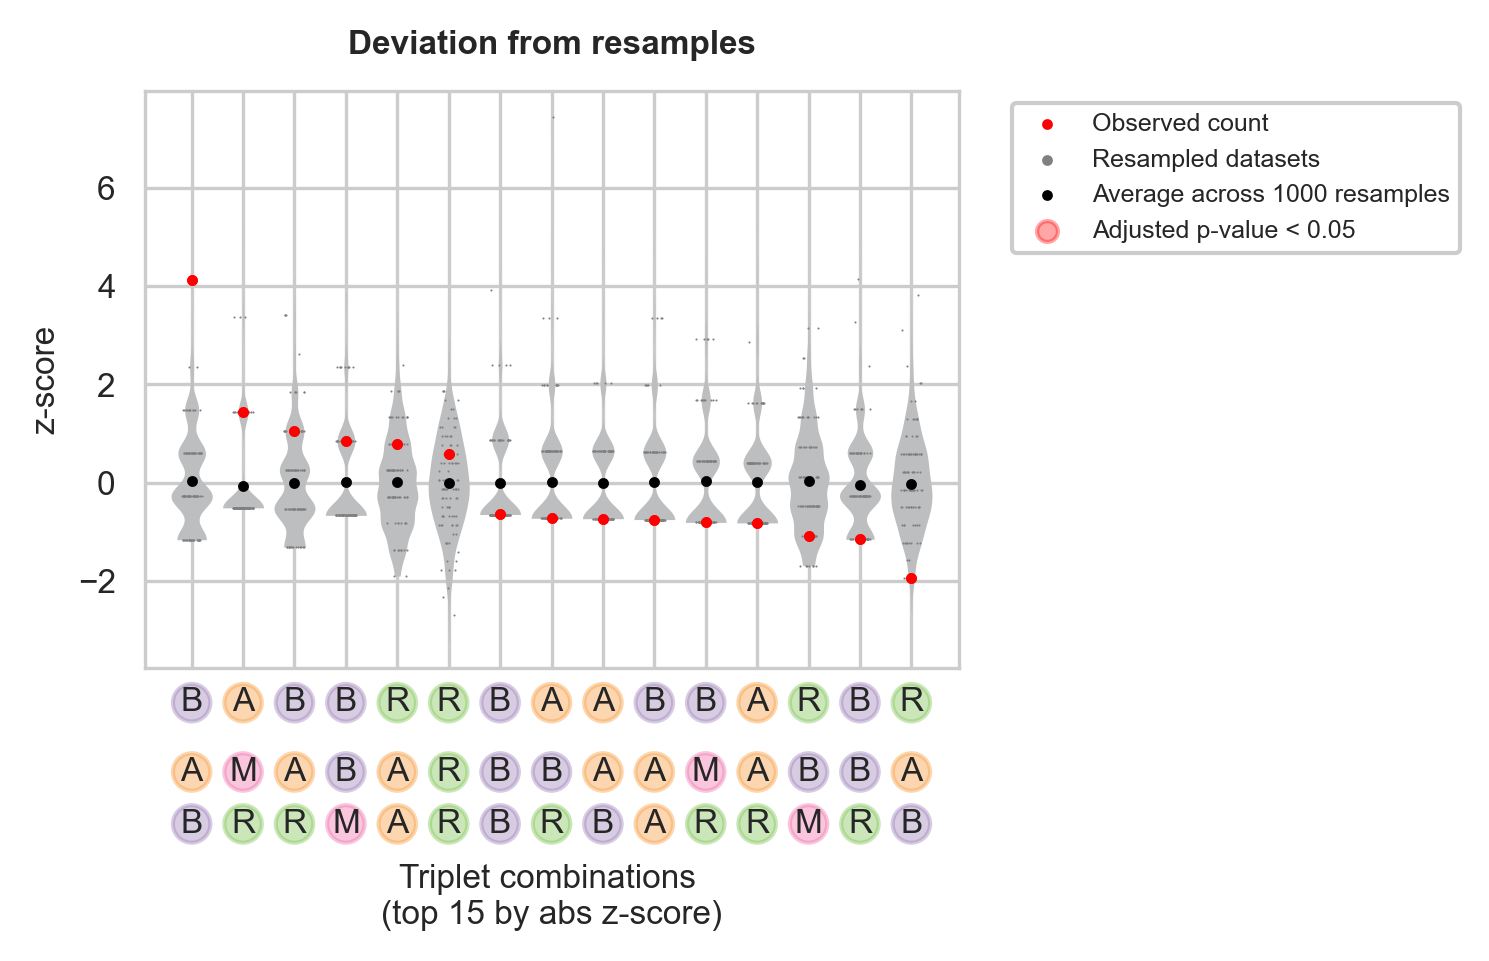

In [38]:
plot.plot_deviation(subtree, 
                    df_true_melt_subset, 
                    df_zscores_i_concat_melt_subset, 
                    df_zscores_i_concat_melt_100resamples_subset, 
                    cell_color_dict,
                    cutoff=cutoff, 
                    num_null=1000,
                    legend_bool=True,
                    legend_pos='outside',
                    save=False, 
                    image_format='png',
                    dpi=300,
                    image_save_path=None)

## Quartet motif analysis

In [39]:
(quartet_dict, 
 cell_fates, 
 dfs_concat) = resample.resample_trees_quartets(all_trees_sorted, 
                                                num_resamples, 
                                                True, 
                                                cell_fates='auto'
                                                )

  0%|          | 0/10000 [00:00<?, ?it/s]

In [40]:
cutoff = 15

In [41]:
(df_true_melt_subset, 
 df_melt_subset, 
 df_melt_100resamples_subset, 
 df_zscores_i_concat_melt_subset, 
 df_zscores_i_concat_melt_100resamples_subset) = plot.dfs_for_plotting(dfs_concat, 
                                                                       num_resamples, 
                                                                       quartet_dict, 
                                                                       cutoff=cutoff, 
                                                                       num_null=1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [42]:
subtree = 'quartet'

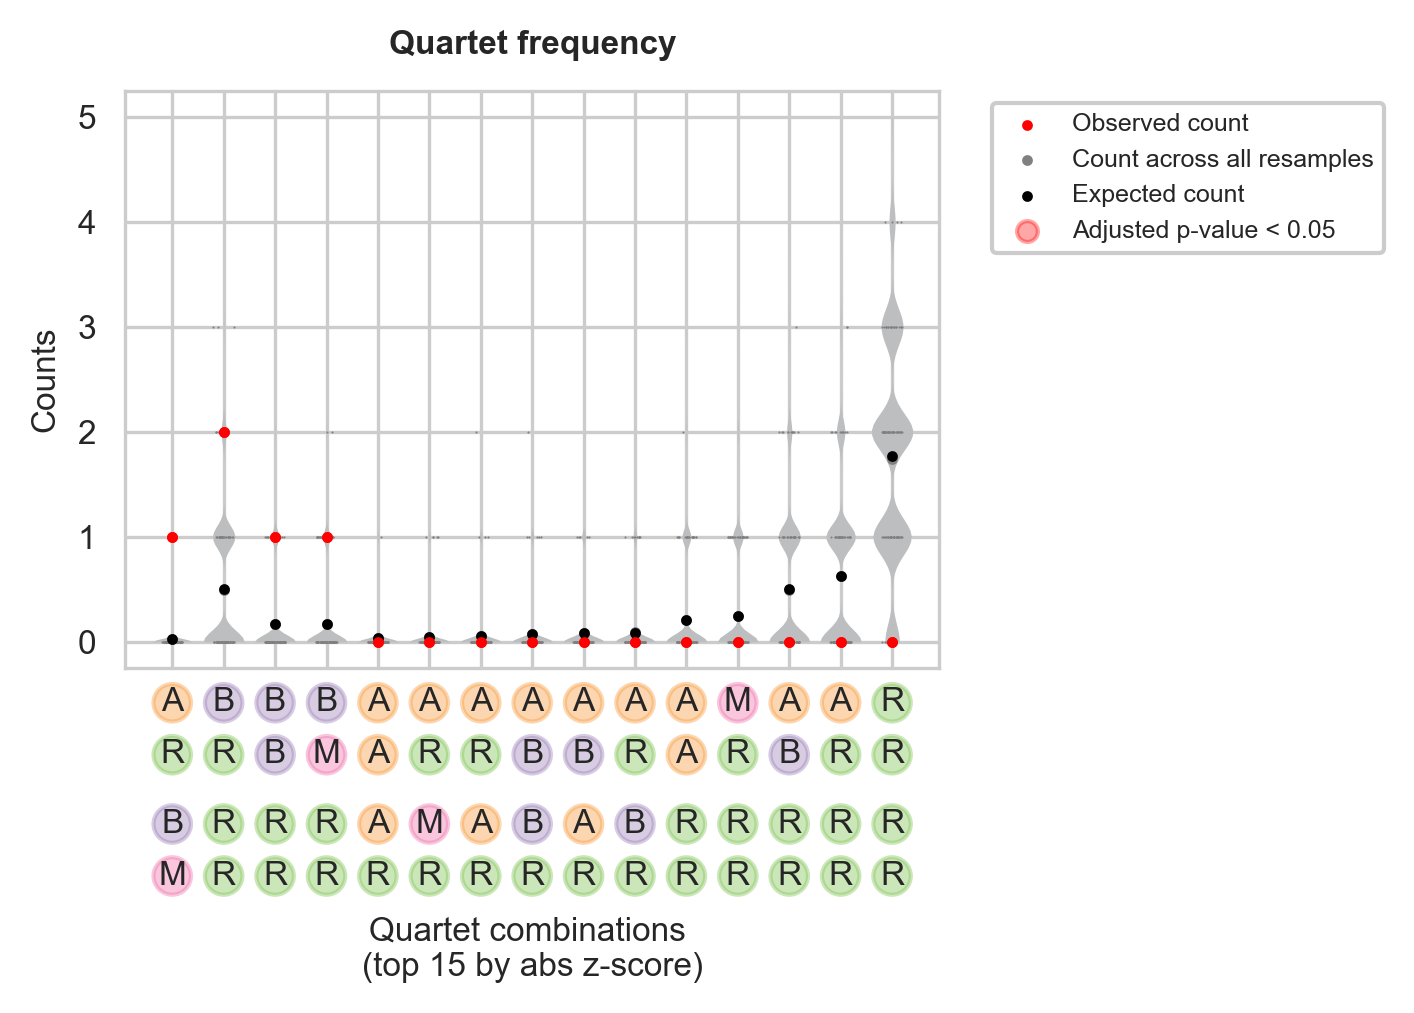

In [43]:
plot.plot_frequency(subtree, 
                    df_true_melt_subset, 
                    df_melt_subset, 
                    df_melt_100resamples_subset, 
                    cell_color_dict,
                    cutoff=cutoff, 
                    legend_bool=True, 
                    legend_pos='outside',
                    save=False, 
                    image_format='png',
                    dpi=300,
                    image_save_path=None)

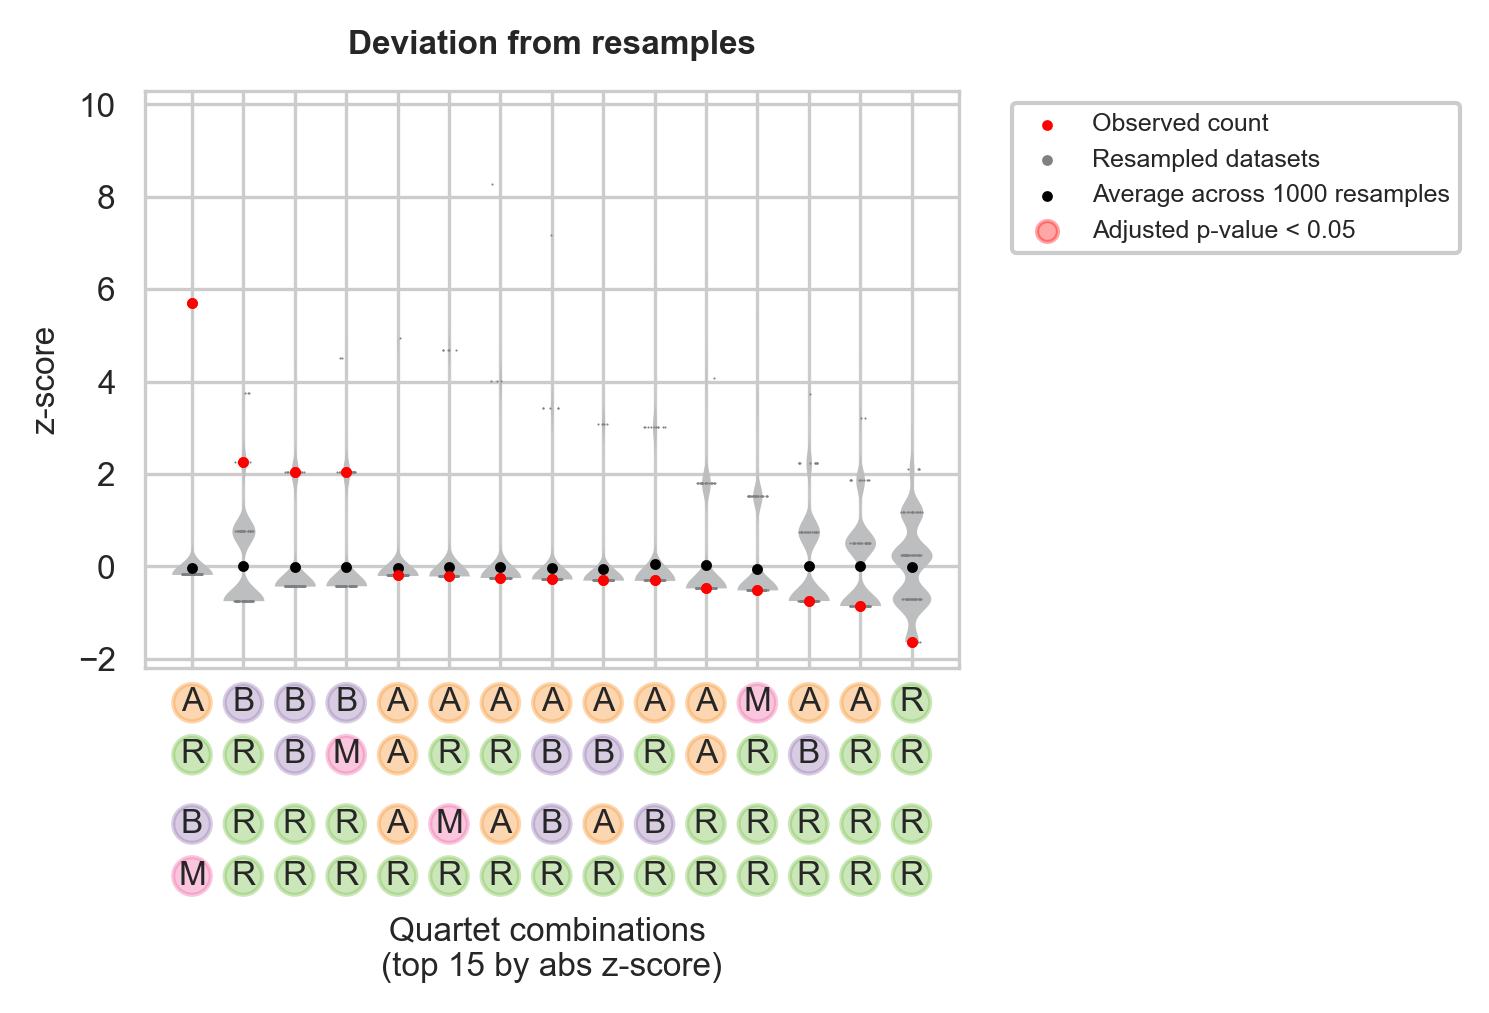

In [44]:
plot.plot_deviation(subtree, 
                    df_true_melt_subset, 
                    df_zscores_i_concat_melt_subset, 
                    df_zscores_i_concat_melt_100resamples_subset, 
                    cell_color_dict,
                    cutoff=cutoff, 
                    num_null=1000,
                    legend_bool=True,
                    legend_pos='outside',
                    save=False, 
                    image_format='png',
                    dpi=300,
                    image_save_path=None)